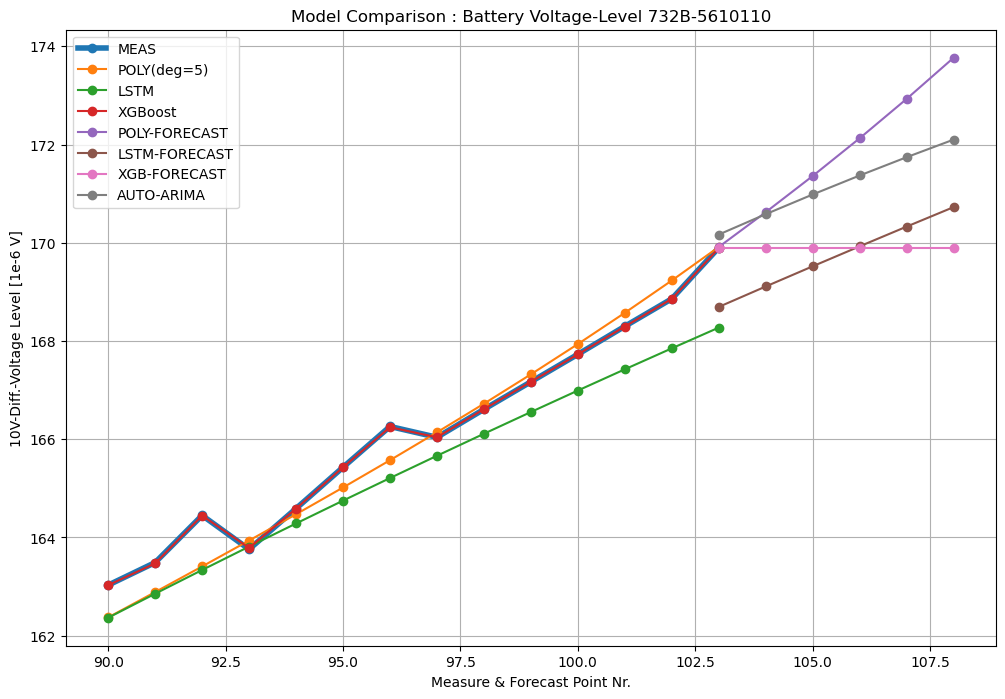

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load measured and model data
x1 = np.arange(104)
y_meas = np.loadtxt("measured_value.txt")
y_poly = np.loadtxt("poly_model_value3.txt")
y_lstm = np.loadtxt("lstm_model_value2.txt")
y_xgb = np.loadtxt("xgb_model_value.txt")

# Load forecast values
y_poly_f = np.loadtxt("poly_forecast_value3.txt")
y_lstm_f = np.loadtxt("lstm_forecast_value2.txt")
y_xgb_f = np.loadtxt("xgb_forecast_value.txt")
y_arima = np.loadtxt("arima_forecast_value.txt")
y_arima2 = np.loadtxt("arima_forecast_value2.txt")

# Plot data
x2 = np.arange(6) +  x1[-1]  # Forecast points start after last measure point number
plt.figure(figsize=(12, 8))
plt.plot(x1[90:104:1], y_meas[90:104:1], '-o', lw=4, label="MEAS")
plt.plot(x1[90:104:1], y_poly[90:104:1], '-o', label="POLY(deg=5)")
plt.plot(x1[90:104:1], y_lstm[90:104:1], '-o', label="LSTM")
plt.plot(x1[90:104:1], y_xgb[90:104:1], '-o', label="XGBoost")
plt.plot(x2, y_poly_f, '-o', label="POLY-FORECAST")
plt.plot(x2, y_lstm_f, '-o', label="LSTM-FORECAST")
plt.plot(x2, y_xgb_f, '-o', label="XGB-FORECAST")
plt.plot(x2, y_arima2, '-o', label="AUTO-ARIMA")

plt.title("Model Comparison : Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure & Forecast Point Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")

plt.legend(loc='upper left')
plt.grid()
plt.show()


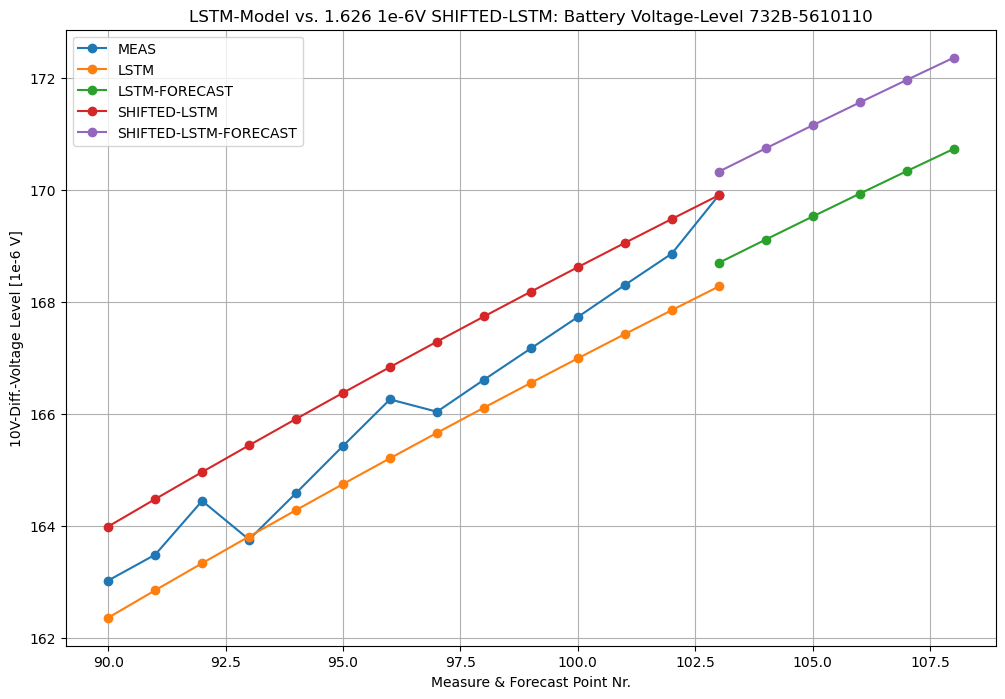

In [2]:
# Calculate the shift gap between measured and LSTM value
shift_lstm = y_meas[-1] - y_lstm[-1]
new_lstm_value = y_lstm + shift_lstm
new_lstm_f = y_lstm_f + shift_lstm

plt.figure(figsize=(12, 8))
plt.plot(x1[90:104:1], y_meas[90:104:1], '-o', label="MEAS")
plt.plot(x1[90:104:1], y_lstm[90:104:1], '-o', label="LSTM")
plt.plot(x2, y_lstm_f, '-o', label="LSTM-FORECAST")
plt.plot(x1[90:104:1], new_lstm_value[90:104:1], '-o', label="SHIFTED-LSTM")
plt.plot(x2, new_lstm_f, '-o', label="SHIFTED-LSTM-FORECAST")
#plt.plot(x2, y_arima, '-o', label="ARIMA")

plt.title(f"LSTM-Model vs. {shift_lstm:.3f} 1e-6V SHIFTED-LSTM: Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure & Forecast Point Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")

plt.legend(loc='upper left')
plt.grid()
plt.show()


In [3]:
print(shift_lstm)

1.6264400000000023


In [4]:
print(new_lstm_f)

[170.32114 170.73725 171.1484  171.55478 171.95643 172.35332]


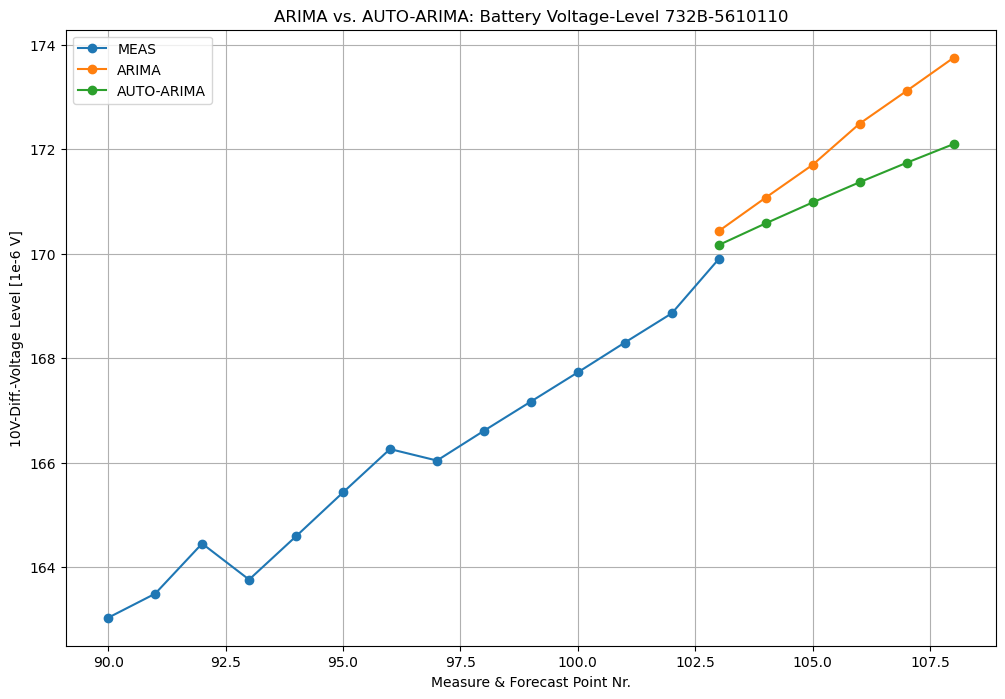

In [5]:
plt.figure(figsize=(12, 8))

plt.plot(x1[90:104:1], y_meas[90:104:1], '-o', label="MEAS")
plt.plot(x2, y_arima, '-o', label="ARIMA")
plt.plot(x2, y_arima2, '-o', label="AUTO-ARIMA")

plt.title(f"ARIMA vs. AUTO-ARIMA: Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure & Forecast Point Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")

plt.legend(loc='upper left')
plt.grid()
plt.show()


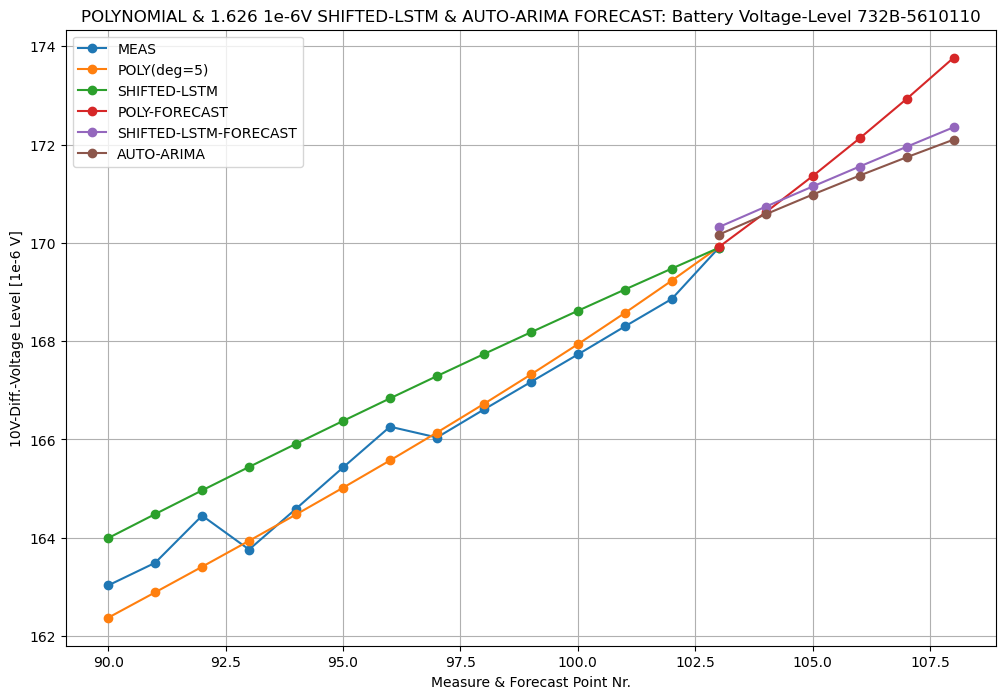

In [6]:
plt.figure(figsize=(12, 8))

plt.plot(x1[90:104:1], y_meas[90:104:1], '-o', label="MEAS")
plt.plot(x1[90:104:1], y_poly[90:104:1], '-o', label="POLY(deg=5)")
plt.plot(x1[90:104:1], new_lstm_value[90:104:1], '-o', label="SHIFTED-LSTM")
plt.plot(x2, y_poly_f, '-o', label="POLY-FORECAST")
plt.plot(x2, new_lstm_f, '-o', label="SHIFTED-LSTM-FORECAST")
plt.plot(x2, y_arima2, '-o', label="AUTO-ARIMA")

plt.title(f"POLYNOMIAL & {shift_lstm:.3f} 1e-6V SHIFTED-LSTM & AUTO-ARIMA FORECAST: Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure & Forecast Point Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")

plt.legend(loc='upper left')
plt.grid()
plt.show()


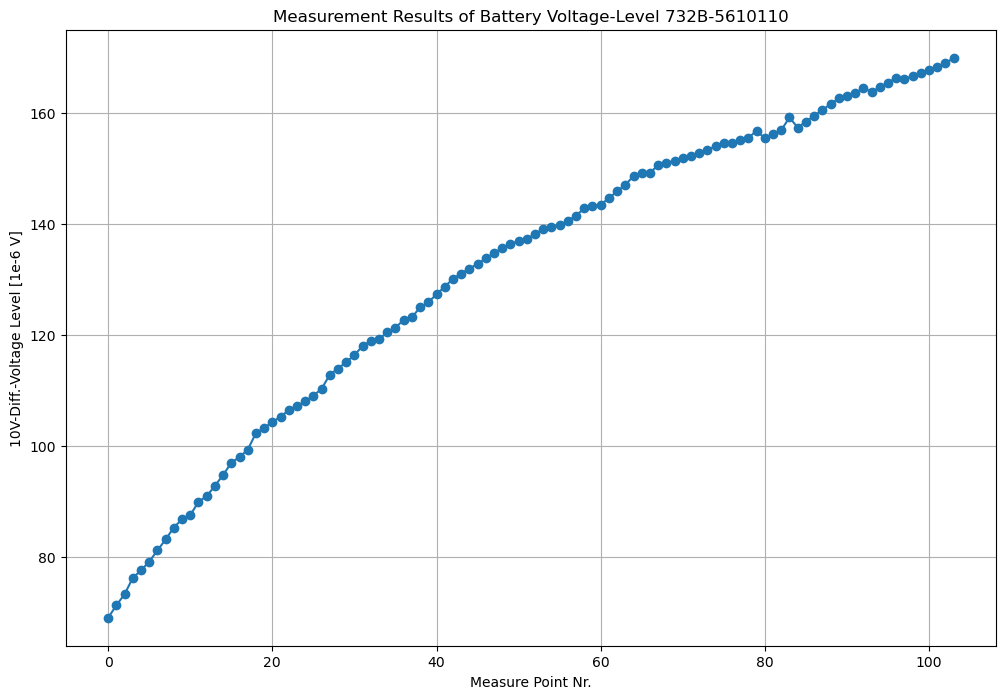

In [7]:
# Plot data
plt.figure(figsize=(12, 8))
plt.plot(x1, y_meas, '-o')

plt.title("Measurement Results of Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure Point Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")

plt.grid()
plt.show()
